## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('nc.csv')
data.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [3]:
data['mature'].unique()

array(['younger mom', 'mature mom'], dtype=object)

In [4]:
# # imputing missing habit values
# from sklearn.impute import SimpleImputer

# x = data.iloc[:, -2].values
# x = x.reshape(-1,1)
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer = imputer.fit(x)
# x = imputer.transform(x)
# data.iloc[:, -2] = x 

# data['habit'].unique()

In [5]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# data['habit'] = encoder.fit_transform(data['habit'])

# data['habit'].unique()

### Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

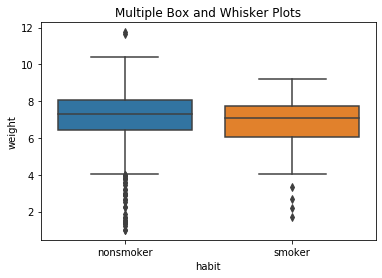

In [6]:
sns.boxplot(y = data['weight'], x = data['habit'])
plt.title('Multiple Box and Whisker Plots')
plt.show()

The plots show a lower median weight for the smokers indicating babies born to smoker mothers have a lower birth weight.

### Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

H0: There is no difference between the average weights of babies born to smoking and non-smoking mothers.                     

H1: There is a difference between the average weights of babies born to smoking and non-smoking mothers.

In [7]:
import statsmodels.stats.weightstats as st

weight_smoker = data[data['habit'] == 'smoker']['weight']
weight_nonsmoker = data[data['habit'] == 'nonsmoker']['weight']

w_1 = st.DescrStatsW(weight_smoker)
w_2 = st.DescrStatsW(weight_nonsmoker)
means_comp = st.CompareMeans(w_1, w_2)

# number of observations, means and standard deviations
smokers = w_1.nobs
nonsmokers = w_2.nobs
mean_smoker = w_1.mean
mean_nonsmoker = w_2.mean
sd_smoker = w_1.std
sd_nonsmoker = w_2.std
print('smokers:', smokers)
print('Smokers mean:' ,mean_smoker)
print('smokers sd:', sd_smoker)
print()
print('non smokers:', nonsmokers)
print('non smokers mean:', mean_nonsmoker)
print('non smokers sd:', sd_nonsmoker)
print()

# hypothesis
h = means_comp.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

#standard error, Z-score, and p-value for the test
se = means_comp.std_meandiff_separatevar
testZ = h[0]
p_value = h[1]
print(f'Standard error = {se}')
print(f'Test statistic: = {testZ}')
print(f'p-value = {p_value}')

# Decision based on p value
if p_value < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

smokers: 126.0
Smokers mean: 6.828730158730159
smokers sd: 1.380668106117173

non smokers: 873.0
non smokers mean: 7.144272623138601
non smokers sd: 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


Thus There is a difference between the average weights of babies born to smoking and non-smoking mothers.

### Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

H0: There is no difference between the average weights gained by younger mothers and mature mothers.                    

H1: There is a difference between the average weights gained by younger mothers and mature mothers. 

In [8]:
import statsmodels.stats.weightstats as st

weight_young = data[data['habit'] == 'younger mom']['gained']
weight_mature = data[data['habit'] == 'mature mom']['gained']

w_1 = st.DescrStatsW(weight_young)
w_2 = st.DescrStatsW(weight_mature)
means_comp = st.CompareMeans(w_1, w_2)

# number of observations, means and standard deviations
n_young = w_1.nobs
n_mature = w_2.nobs
mean_young = w_1.mean
mean_mature = w_2.mean
sd_young = w_1.std
sd_mature = w_2.std
print('young mothers:', n_mature)
print('young mean:' ,mean_smoker)
print('young sd:', sd_smoker)
print()
print('mature mothers:', nonsmokers)
print('mature mean:', mean_nonsmoker)
print('mature sd:', sd_nonsmoker)
print()

# hypothesis
h = means_comp.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

#standard error, Z-score, and p-value for the test
testZ = h[0]
p_value = h[1]
print(f'Standard error = {se}')
print(f'Test statistic: = {testZ}')
print(f'p-value = {p_value}')

# Decision based on p value
if p_value < 0.05:
    print('reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

young mothers: 0.0
young mean: 6.828730158730159
young sd: 1.380668106117173

mature mothers: 873.0
mature mean: 7.144272623138601
mature sd: 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: = nan
p-value = nan
Fail to reject null hypothesis


/home/ada/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:133: RuntimeWarning: invalid value encountered in double_scalars
  return self.sum / self.sum_weights
/home/ada/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:180: RuntimeWarning: invalid value encountered in double_scalars
  return self.sumsquares / (self.sum_weights - self.ddof)
/home/ada/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:188: RuntimeWarning: invalid value encountered in double_scalars
  return self.sumsquares / self.sum_weights


Thus there's no difference between the average weights gained by younger mothers and mature mothers. 

### Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [18]:
# from scipy.stats import sem, t
# from scipy import mean
# confidence = 0.95
# data = [1, 2, 3, 4, 5]

# n = len(data)
# m = mean(data)
# std_err = sem(data)
# h = std_err * t.ppf((1 + confidence) / 2, n - 1)

In [17]:
# import os
# os.environ['R_HOME'] = "/usr/share/anaconda3/lib/R"

# import rpy2.robjects as robjects
# %load_ext rpy2.ipython

In [19]:
# inference(y = data$weight, x = data$habit, est = "mean", type = "ci", null = 0, 
#           alternative = "twosided", method = "theoretical")